## Install required libraries

In [ ]:
!pip install matplotlib | tail -n 1
!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1

## Import required libralies

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import display
import torch
import torch.nn as nn
import torch.optim as optim
from torchviz import make_dot

## Change settings

In [11]:
# Change default font size
plt.rcParams['font.size'] = 14

# Change default graph size
plt.rcParams['figure.figsize'] = (6, 6)

# Square indicate ON
plt.rcParams['axes.grid'] = True

# Set precision of floating-point numbers in numpy
np.set_printoptions(suppress=True, precision=4)

## Prepare the learning dataset

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"

# Delimiter("\s+") is a blank character (one or more)
raw_df = pd.read_csv(data_url, sep="\s+",
skiprows=22, header=None)

# hstack means horizontal stack
# raw_df.values[::2, :] means “take every other row (rows 0, 2, 4, …) and
# all columns from raw_df
# raw_df.values[1::2, :2] selects every other row starting from the second row,
# and from each of those rows it keeps only the first two columns
# (Not extract the MEDV values)
x_org = np.hstack([raw_df.values[::2, :],
raw_df.values[1::2, :2]])

# raw_df.values[1::2, 2] selects LSTAT data
y_data = raw_df.values[1::2, 2]
feature_names = np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT'])

# Confirmation of the learning data
print('original data', x_org.shape, y_data.shape)
print('Item name:', feature_names)

In [48]:
# Extract the "RM" item
x_data = x_org[:,feature_names == 'RM']

# Confirm the dataset

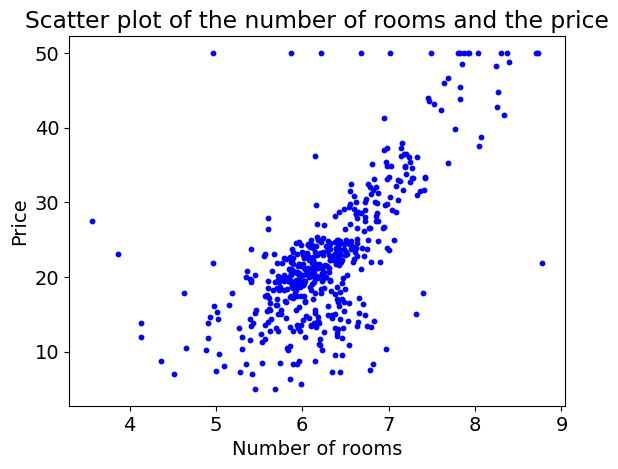

In [7]:
# Display scatter plot
plt.scatter(x_data, y_data, s=10, c='b')
plt.xlabel('Number of rooms')
plt.ylabel('Price')
plt.title('Scatter plot of the number of rooms and the price')
plt.show()

## Define the class of the prediction model

In [ ]:
class Net(nn.Module):
  def __init__(self, n_input, n_output) -> None:
    super().__init__()

    # Definition of output layer
    self.l1 = nn.Linear(n_input, n_output)

    # Initialize weight and bias to 1.0
    nn.init.constant_(self.l1.weight, 1.0)
    nn.init.constant_(self.l1.bias, 1.0)

  # Difinition of the prediction function
  def forward(self, x_data):
    x1 = self.l1(x_data)
    return x1

## Prepare the inputs and labels

In [ ]:
# Dimension of input
n_input = x_data.shape[1]

# Dimension of output
n_output = 1

In [ ]:
# Learning rate
lr = 0.01

# Create prediction function
net = Net(n_input, n_output)

# Create Loss function
criterion = nn.MSELoss()

# Create Optimization function
optimizer = optim.SGD(net.parameters(), lr=lr)

# Repetition counts
num_epochs = 50000

# Record evaluation results
history = np.zeros((0, 2))

# Tensor Variabilization
inputs = torch.tensor(x_data).float()
labels = torch.tensor(y_data).float()

# Transform labels variable to (N, 1) dimension
labels1 = labels.view((-1, 1))

## Execute linear regression

In [ ]:
# Main loop process
for epoch in range(num_epochs):
  # Initialize gradient
  optimizer.zero_grad()

  # 1. Calculate prediction
  outputs = net(inputs)

  # 2. Calculate loss
  loss = criterion(outputs, labels1) / 2.0

  # 3. Calculate gradient
  loss.backward()

  # 4. Adjust parameters
  optimizer.step()

  # Record the intermediate results every 100 times
  if (epoch % 100 == 0):
    history = np.vstack((history, np.array([epoch, loss.item()])))
    print(f'Epoch {epoch} loss: {loss.item():.5f}')

## Confirm the loss values

In [ ]:
# Print initial and final value of the loss
print(f'Initial loss: {history[0,1]:.5f}')
print(f'Final loss: {history[-1,1]:.5f}')

Initial loss: 154.22493
Final loss: 21.80033


## Display the learning curve based on the loss

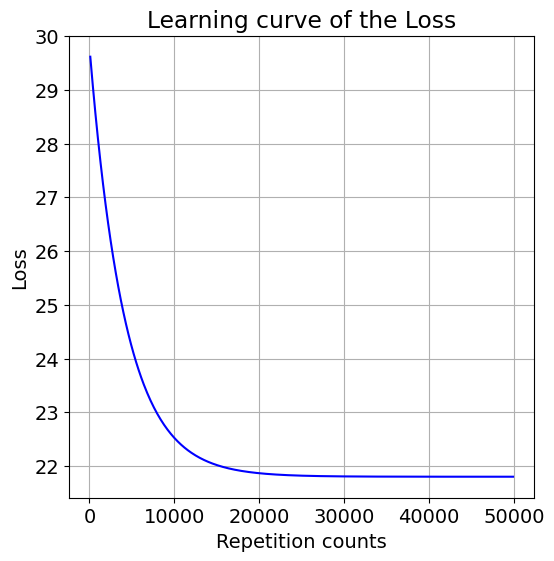

In [ ]:
plt.plot(history[1:,0], history[1:,1], 'b')
plt.xlabel('Repetition counts')
plt.ylabel('Loss')
plt.title('Learning curve of the Loss')
plt.show()


## Expand the dimension of the input tensor from 1 to 2
<br>

## Add the LSTAT (Low-income rate) item

In [ ]:
x_add = x_org[:, feature_names == 'LSTAT']
x_expand = np.hstack((x_data, x_add))

## Prepare the inputs and labels

In [ ]:
# Update n_input
n_input = x_expand.shape[1]

# Create the model instance
net = Net(n_input, n_output)

In [ ]:
# Learning rate (As the loss function rate becomes 'nan',
# we change the lr from 0.01 to 0.001)
lr = 0.001

# Create prediction function
net = Net(n_input, n_output)

# Create Loss function
criterion = nn.MSELoss()

# Create Optimization function
optimizer = optim.SGD(net.parameters(), lr=lr)

# Repetition counts(Reduce the counts from 50000 to 2000)
num_epochs = 2000

# Record evaluation results
history = np.zeros((0, 2))

# Tensor Variabilization
inputs = torch.tensor(x_expand).float()

# labels and labels1 are used again (Not change the previous ones)

## Execute the linear regression

In [ ]:
# Main loop process
for epoch in range(num_epochs):
  # Initialize gradient
  optimizer.zero_grad()

  # 1. Calculate prediction
  outputs = net(inputs)

  # 2. Calculate loss
  loss = criterion(outputs, labels1) / 2.0

  # 3. Calculate gradient
  loss.backward()

  # 4. Adjust parameters
  optimizer.step()

  # Record the intermediate results every 100 times
  if (epoch % 100 == 0):
    history = np.vstack((history, np.array([epoch, loss.item()])))
    print(f'Epoch {epoch} loss: {loss.item():.5f}')

## Confirm the loss values

In [ ]:
# Print initial and final loss values
print(f'Initial loss value: {history[0, 1]:.5f}')
print(f'Final loss value: {history[-1,1]:.5f}')

Initial loss value: 112.06398
Final loss value: 15.28023


## Display the learning curve based on the loss

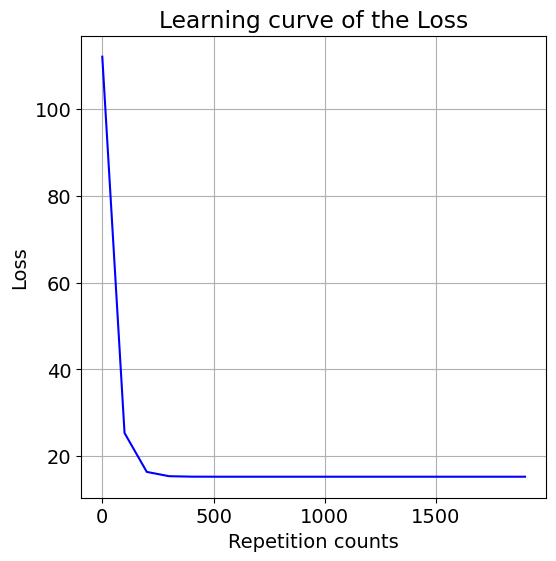

In [ ]:
plt.plot(history[:,0], history[:,1], 'b')
plt.xlabel('Repetition counts')
plt.ylabel('Loss')
plt.title('Learning curve of the Loss')
plt.show()